In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [514]:
clients = pd.read_excel('/Users/HanwenSun/Downloads/RegencyClientList.xlsx')

filtered_clients = clients[clients['Client Number'].notnull()]

filtered_clients = filtered_clients[filtered_clients['Risk Rating'] <= 5]

In [515]:
charge_annual = 0.01
charge_flat = 5000

fixed_mig = 500000
fixed_annual = 200000

year = 3
attrition = .1
annual_spend_in = .08
cards_num_in = .1
std_dev = .01

card_issue = 45
card_service = 40

mig = [2000, 5000, 7000]
ser = [1500, 2000, 3000]

default = [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
write_off = [3,3,3,3,3,4,6]

num_reps = 500
iterations = 1000

# Evaluate the attractiveness of client

In [517]:
attractiveness = []    
chance_list = []
for j in range(filtered_clients.shape[0]):
    
    client = filtered_clients.iloc[j, :]

    risk = int(client['Risk Rating'])
    complexity = int(client['Complexity Level'])
    annual_spend = int(client['Annual Spend Volume'])
    card_num = int(client['# of Cards'])
    default_rate = default[complexity - 1]

    iterations = 1000

    profit_list = []
    chance = 0

    for i in range(iterations):

        result = pd.DataFrame(index=range(year),
                 data = {'Annual Spending Increase': 
                         np.random.normal(annual_spend_in, std_dev, 3),
                         '# of Card Increase': 
                         np.random.normal(cards_num_in, std_dev, 3),
                         'Default': 
                         np.random.binomial(1, default_rate,3),
                         'Attrition': 
                         np.random.binomial(1, attrition, 3),
                        })

        if result['Default'][0] == 1:

            cost = annual_spend * \
            (1+result['Annual Spending Increase'][0]) * \
            write_off[risk-1]/12 + \
            mig[complexity-1] + \
            ser[complexity-1] + \
            card_issue * card_num * result['# of Card Increase'][0] + \
            card_service * card_num * (1 + result['# of Card Increase'][0])

            revenue = annual_spend * \
            (1+result['Annual Spending Increase'][0]) * \
            (12-write_off[risk-1])/12 * charge_annual + \
            charge_flat

        elif result['Attrition'][0] == 1:

            cost = mig[complexity-1] + \
            ser[complexity-1] + \
            card_issue * card_num * result['# of Card Increase'][0] + \
            card_service * card_num * (1 + result['# of Card Increase'][0])

            revenue = annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * charge_annual + \
            charge_flat

        elif result['Default'][1] == 1:

            cost = annual_spend * \
            (1+result['Annual Spending Increase'][0]) * \
            (1+result['Annual Spending Increase'][1]) * \
            write_off[risk-1]/12 + \
            mig[complexity-1] + \
            ser[complexity-1] *2 + \
            card_issue * card_num * \
            (result['# of Card Increase'][0] + \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
             (1 + result['# of Card Increase'][0])
            ) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) * \
            (result['# of Card Increase'][1] + 1)  + \
            card_service * card_num * (1 + result['# of Card Increase'][0])

            revenue =  annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * charge_annual + \
            charge_flat + \
            annual_spend * \
            (1+result['Annual Spending Increase'][0]) * \
            (1+result['Annual Spending Increase'][1]) * \
            (12-write_off[risk-1])/12 * charge_annual + \
            charge_flat

        elif result['Attrition'][1] == 1:

            cost = mig[complexity-1] + \
            ser[complexity-1] *2 + \
            card_issue * card_num * \
            (result['# of Card Increase'][0] + \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
             (1 + result['# of Card Increase'][0])
            ) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) * \
            (result['# of Card Increase'][1] + 1) + \
            card_service * card_num * (1 + result['# of Card Increase'][0])

            revenue = annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * charge_annual + \
            charge_flat + annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * \
            (1 + result['Annual Spending Increase'][1]) * charge_annual + \
            charge_flat

        elif result['Default'][2] == 1:

            cost = mig[complexity-1] + \
            ser[complexity-1] *3 + \
            card_issue * card_num * \
            (result['# of Card Increase'][0] + \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
             (1 + result['# of Card Increase'][0]) + \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
             (result['# of Card Increase'][2] + 1) - \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
            ) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) * \
            (result['# of Card Increase'][1] + 1) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) * \
            (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1) + \
            annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * \
            (1 + result['Annual Spending Increase'][1]) * \
            (1 + result['Annual Spending Increase'][2]) * \
            write_off[risk-1]/12

            revenue = annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * charge_annual + \
            charge_flat + annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * \
            (1 + result['Annual Spending Increase'][1]) * charge_annual + \
            charge_flat + annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * \
            (1 + result['Annual Spending Increase'][1]) * \
            (1 + result['Annual Spending Increase'][2]) * charge_annual * \
            (12-write_off[risk-1])/12 + \
            charge_flat

        else:

            cost = mig[complexity-1] + \
            ser[complexity-1] *3 + \
            card_issue * card_num * \
            (result['# of Card Increase'][0] + \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
             (1 + result['# of Card Increase'][0]) + \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
            (result['# of Card Increase'][2] + 1) - \
             (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
            ) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) * \
            (result['# of Card Increase'][1] + 1) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) + \
            card_service * card_num * (1 + result['# of Card Increase'][0]) * \
            (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1)

            revenue = annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * charge_annual + \
            charge_flat + annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * \
            (1 + result['Annual Spending Increase'][1]) * charge_annual + \
            charge_flat + annual_spend * \
            (1 + result['Annual Spending Increase'][0]) * \
            (1 + result['Annual Spending Increase'][1]) * \
            (1 + result['Annual Spending Increase'][2]) * charge_annual + \
            charge_flat

        profit = revenue - cost
        
        if profit < 0:
            chance = chance + 1

        profit_list.append(profit)

    attractiveness.append(np.mean(profit))
    chance_list.append(chance/iterations)

In [474]:
expect = pd.DataFrame(data = {'Expected Profit': 
                     np.round(attractiveness, 2),
                              'Risk':
                     np.round(chance_list, 2),         
                     'Client Number':
                     filtered_clients['Client Number']
                    })

In [519]:
filtered_clients['Expected Profit'] = expect['Expected Profit']
filtered_clients['Risk'] = expect['Risk']

In [481]:
filtered_clients.sort_values('Expected Profit', ascending = False)

,Client Number,Name,Risk Rating,Complexity Level,Annual Spend Volume,# of Cards,Expected Profit,Risk
63,64.0,DELMANA CORPORATION,3.0,3.0,64734342.53,67.0,2202219.33,0.02
113,114.0,INTERNATIONAL SOCIETY OF LOPTA,1.0,2.0,57815959.49,84.0,1986588.45,0.01
133,134.0,MANX TECH,4.0,2.0,59682930.02,782.0,1966001.62,0.01
32,33.0,BRIDGE TO TERRESTRIA ENTERTAINMENT,5.0,3.0,39231276.41,1.0,1369413.14,0.02
118,119.0,JOHNSON AND PRODUCTS,4.0,2.0,27507704.23,11.0,977758.28,0.01
...,...,...,...,...,...,...,...,...
2,3.0,AEONS ENTERTAINMENT,4.0,3.0,19529.69,13.0,-2380.28,1.00
207,208.0,WORLD PARTICLE ACCELETRON,5.0,3.0,133304.85,84.0,-9731.24,1.00
74,75.0,EMANI OPERATIONS,5.0,2.0,178594.70,13.0,-49184.02,0.10
137,138.0,MELLIA HOLDING INC,1.0,2.0,673023.62,489.0,-51917.58,1.00


In [482]:
filtered_clients.sort_values('Risk', ascending = False)

,Client Number,Name,Risk Rating,Complexity Level,Annual Spend Volume,# of Cards,Expected Profit,Risk
2,3.0,AEONS ENTERTAINMENT,4.0,3.0,19529.69,13.0,-2380.28,1.0
207,208.0,WORLD PARTICLE ACCELETRON,5.0,3.0,133304.85,84.0,-9731.24,1.0
52,53.0,COMPAGNIE DES AFFAIRES,5.0,3.0,748.57,2.0,-1299.32,1.0
137,138.0,MELLIA HOLDING INC,1.0,2.0,673023.62,489.0,-51917.58,1.0
147,148.0,NUBON,5.0,3.0,2337.11,3.0,-1399.30,1.0
...,...,...,...,...,...,...,...,...
90,91.0,GLOBAL HEALTH CORP,5.0,1.0,896324.64,9.0,38755.89,0.0
151,152.0,PANTRALIA,5.0,1.0,2529703.47,61.0,86812.86,0.0
92,93.0,GOLDBERG AND SONS LLP,5.0,1.0,1031130.76,1.0,28265.13,0.0
14,15.0,ANTA MCAL CO,4.0,1.0,339091.56,12.0,18812.68,0.0


# Simulate Three Year

In [521]:
strat = filtered_clients

company_profit_list = []

iterations = 1000

for k in range(iterations):
    
    attractiveness = []
    
    for j in range(strat.shape[0]):

        client = strat.iloc[j, :]

        risk = int(client['Risk Rating'])
        complexity = int(client['Complexity Level'])
        annual_spend = int(client['Annual Spend Volume'])
        card_num = int(client['# of Cards'])
        default_rate = default[complexity - 1]

        rep = 1

        profit_list = []

        for i in range(rep):

            result = pd.DataFrame(index=range(year),
                     data = {'Annual Spending Increase': 
                             np.random.normal(annual_spend_in, std_dev, 3),
                             '# of Card Increase': 
                             np.random.normal(cards_num_in, std_dev, 3),
                             'Default': 
                             np.random.binomial(1, default_rate,3),
                             'Attrition': 
                             np.random.binomial(1,attrition,3),
                            })

            if result['Default'][0] == 1:

                cost = annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                write_off[risk-1]/12 + \
                mig[complexity-1] + \
                ser[complexity-1] + \
                card_issue * card_num * result['# of Card Increase'][0] + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue = annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                (12-write_off[risk-1])/12 * charge_annual + \
                charge_flat

            elif result['Attrition'][0] == 1:

                cost = mig[complexity-1] + \
                ser[complexity-1] + \
                card_issue * card_num * result['# of Card Increase'][0] + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat

            elif result['Default'][1] == 1:

                cost = annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                (1+result['Annual Spending Increase'][1]) * \
                write_off[risk-1]/12 + \
                mig[complexity-1] + \
                ser[complexity-1] *2 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0])
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1)  + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue =  annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + \
                annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                (1+result['Annual Spending Increase'][1]) * \
                (12-write_off[risk-1])/12 * charge_annual + \
                charge_flat

            elif result['Attrition'][1] == 1:

                cost = mig[complexity-1] + \
                ser[complexity-1] *2 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0])
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                charge_flat

            elif result['Default'][2] == 1:

                cost = mig[complexity-1] + \
                ser[complexity-1] *3 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0]) + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
                 (result['# of Card Increase'][2] + 1) - \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1) + \
                annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * \
                (1 + result['Annual Spending Increase'][2]) * \
                write_off[risk-1]/12

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * \
                (1 + result['Annual Spending Increase'][2]) * charge_annual * \
                (12-write_off[risk-1])/12 + \
                charge_flat

            else:

                cost = mig[complexity-1] + \
                ser[complexity-1] *3 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0]) + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
                (result['# of Card Increase'][2] + 1) - \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1)

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * \
                (1 + result['Annual Spending Increase'][2]) * charge_annual + \
                charge_flat

            profit = revenue - cost

            profit_list.append(profit)

        attractiveness.append(np.mean(profit))

    company_profit = np.sum(attractiveness) - fixed_mig - fixed_annual * 3
    company_profit_list.append(company_profit)

1.8


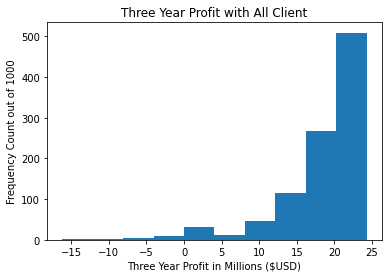

In [523]:
prof = pd.DataFrame(data = {'profit':company_profit_list})

print(prof[prof['profit'] <= 0].shape[0]/10)

plt.hist(prof['profit']/1e6)
plt.title('Three Year Profit with All Client')
plt.ylabel('Frequency Count out of 1000')
plt.xlabel('Three Year Profit in Millions ($USD)')

plt.show()

In [524]:
prof.describe()

,profit
count,1.000000e+03
mean,1.832535e+07
std,5.689329e+06
min,-1.618388e+07
25%,1.683123e+07
50%,2.033043e+07
75%,2.188753e+07
max,2.427920e+07


# Risk Level Simulation

In [291]:
leved_result = []

for p in range(5):
    
    leveled_clients = filtered_clients[filtered_clients['Risk Rating'] == p+1]

    company_profit_list = []

    iterations = 1000

    for k in range(iterations):

        attractiveness = []

        for j in range(leveled_clients.shape[0]):

            client = leveled_clients.iloc[j,:]

            risk = int(client['Risk Rating'])
            complexity = int(client['Complexity Level'])
            annual_spend = int(client['Annual Spend Volume'])
            card_num = int(client['# of Cards'])
            default_rate = default[complexity - 1]

            rep = 1

            profit_list = []

            for i in range(rep):

                result = pd.DataFrame(index=range(year),
                         data = {'Annual Spending Increase': 
                                 np.random.normal(annual_spend_in, std_dev, 3),
                                 '# of Card Increase': 
                                 np.random.normal(cards_num_in, std_dev, 3),
                                 'Default': 
                                 np.random.binomial(1, default_rate,3),
                                 'Attrition': 
                                 np.random.binomial(1,attrition,3),
                                })

                if result['Default'][0] == 1:

                    cost = annual_spend * \
                    (1+result['Annual Spending Increase'][0]) * \
                    write_off[risk-1]/12 + \
                    mig[complexity-1] + \
                    ser[complexity-1] + \
                    card_issue * card_num * result['# of Card Increase'][0] + \
                    card_service * card_num * (1 + result['# of Card Increase'][0])

                    revenue = annual_spend * \
                    (1+result['Annual Spending Increase'][0]) * \
                    (12-write_off[risk-1])/12 * charge_annual + \
                    charge_flat

                elif result['Attrition'][0] == 1:

                    cost = mig[complexity-1] + \
                    ser[complexity-1] + \
                    card_issue * card_num * result['# of Card Increase'][0] + \
                    card_service * card_num * (1 + result['# of Card Increase'][0])

                    revenue = annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                    charge_flat

                elif result['Default'][1] == 1:

                    cost = annual_spend * \
                    (1+result['Annual Spending Increase'][0]) * \
                    (1+result['Annual Spending Increase'][1]) * \
                    write_off[risk-1]/12 + \
                    mig[complexity-1] + \
                    ser[complexity-1] *2 + \
                    card_issue * card_num * \
                    (result['# of Card Increase'][0] + \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                     (1 + result['# of Card Increase'][0])
                    ) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                    (result['# of Card Increase'][1] + 1)  + \
                    card_service * card_num * (1 + result['# of Card Increase'][0])

                    revenue =  annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                    charge_flat + \
                    annual_spend * \
                    (1+result['Annual Spending Increase'][0]) * \
                    (1+result['Annual Spending Increase'][1]) * \
                    (12-write_off[risk-1])/12 * charge_annual + \
                    charge_flat

                elif result['Attrition'][1] == 1:

                    cost = mig[complexity-1] + \
                    ser[complexity-1] *2 + \
                    card_issue * card_num * \
                    (result['# of Card Increase'][0] + \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                     (1 + result['# of Card Increase'][0])
                    ) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                    (result['# of Card Increase'][1] + 1) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0])

                    revenue = annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                    charge_flat + annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * \
                    (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                    charge_flat

                elif result['Default'][2] == 1:

                    cost = mig[complexity-1] + \
                    ser[complexity-1] *3 + \
                    card_issue * card_num * \
                    (result['# of Card Increase'][0] + \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                     (1 + result['# of Card Increase'][0]) + \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
                     (result['# of Card Increase'][2] + 1) - \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
                    ) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                    (result['# of Card Increase'][1] + 1) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                    (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1) + \
                    annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * \
                    (1 + result['Annual Spending Increase'][1]) * \
                    (1 + result['Annual Spending Increase'][2]) * \
                    write_off[risk-1]/12

                    revenue = annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                    charge_flat + annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * \
                    (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                    charge_flat + annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * \
                    (1 + result['Annual Spending Increase'][1]) * \
                    (1 + result['Annual Spending Increase'][2]) * charge_annual * \
                    (12-write_off[risk-1])/12 + \
                    charge_flat

                else:

                    cost = mig[complexity-1] + \
                    ser[complexity-1] *3 + \
                    card_issue * card_num * \
                    (result['# of Card Increase'][0] + \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                     (1 + result['# of Card Increase'][0]) + \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
                    (result['# of Card Increase'][2] + 1) - \
                     (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
                    ) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                    (result['# of Card Increase'][1] + 1) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) + \
                    card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                    (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1)

                    revenue = annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                    charge_flat + annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * \
                    (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                    charge_flat + annual_spend * \
                    (1 + result['Annual Spending Increase'][0]) * \
                    (1 + result['Annual Spending Increase'][1]) * \
                    (1 + result['Annual Spending Increase'][2]) * charge_annual + \
                    charge_flat

                profit = revenue - cost

                profit_list.append(profit)

            attractiveness.append(np.mean(profit))

        company_profit = np.sum(attractiveness) - fixed_mig - fixed_annual * 3
        company_profit_list.append(company_profit)
        
    leved_result.append(np.mean(company_profit_list))

In [533]:
level = pd.DataFrame(data = {'profit':leved_result,
                            'level':['Rating 1',
                                    'Rating 2',
                                    'Rating 3',
                                    'Rating 4',
                                    'Rating 5']})

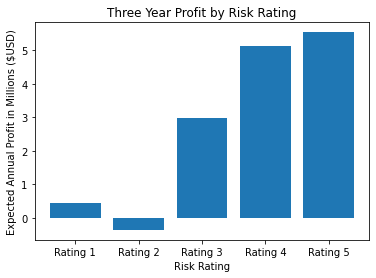

In [534]:
plt.bar(level['level'],level['profit']/1e6, tick_label=level['level'])
plt.title('Three Year Profit by Risk Rating')
plt.ylabel('Expected Annual Profit in Millions ($USD)')
plt.xlabel('Risk Rating')

plt.show()

# Strategy

In [546]:
strat = filtered_clients[filtered_clients['Risk'] < 0.8]

company_profit_list = []

iterations = 1000

for k in range(iterations):
    
    attractiveness = []
    
    for j in range(strat.shape[0]):

        client = strat.iloc[j, :]

        risk = int(client['Risk Rating'])
        complexity = int(client['Complexity Level'])
        annual_spend = int(client['Annual Spend Volume'])
        card_num = int(client['# of Cards'])
        default_rate = default[complexity - 1]

        rep = 1

        profit_list = []

        for i in range(rep):

            result = pd.DataFrame(index=range(year),
                     data = {'Annual Spending Increase': 
                             np.random.normal(annual_spend_in, std_dev, 3),
                             '# of Card Increase': 
                             np.random.normal(cards_num_in, std_dev, 3),
                             'Default': 
                             np.random.binomial(1, default_rate,3),
                             'Attrition': 
                             np.random.binomial(1,attrition,3),
                            })

            if result['Default'][0] == 1:

                cost = annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                write_off[risk-1]/12 + \
                mig[complexity-1] + \
                ser[complexity-1] + \
                card_issue * card_num * result['# of Card Increase'][0] + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue = annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                (12-write_off[risk-1])/12 * charge_annual + \
                charge_flat

            elif result['Attrition'][0] == 1:

                cost = mig[complexity-1] + \
                ser[complexity-1] + \
                card_issue * card_num * result['# of Card Increase'][0] + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat

            elif result['Default'][1] == 1:

                cost = annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                (1+result['Annual Spending Increase'][1]) * \
                write_off[risk-1]/12 + \
                mig[complexity-1] + \
                ser[complexity-1] *2 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0])
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1)  + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue =  annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + \
                annual_spend * \
                (1+result['Annual Spending Increase'][0]) * \
                (1+result['Annual Spending Increase'][1]) * \
                (12-write_off[risk-1])/12 * charge_annual + \
                charge_flat

            elif result['Attrition'][1] == 1:

                cost = mig[complexity-1] + \
                ser[complexity-1] *2 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0])
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) + \
                card_service * card_num * (1 + result['# of Card Increase'][0])

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                charge_flat

            elif result['Default'][2] == 1:

                cost = mig[complexity-1] + \
                ser[complexity-1] *3 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0]) + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
                 (result['# of Card Increase'][2] + 1) - \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1) + \
                annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * \
                (1 + result['Annual Spending Increase'][2]) * \
                write_off[risk-1]/12

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * \
                (1 + result['Annual Spending Increase'][2]) * charge_annual * \
                (12-write_off[risk-1])/12 + \
                charge_flat

            else:

                cost = mig[complexity-1] + \
                ser[complexity-1] *3 + \
                card_issue * card_num * \
                (result['# of Card Increase'][0] + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) - \
                 (1 + result['# of Card Increase'][0]) + \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1) * \
                (result['# of Card Increase'][2] + 1) - \
                 (1 + result['# of Card Increase'][0]) * (result['# of Card Increase'][1] + 1)
                ) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) + \
                card_service * card_num * (1 + result['# of Card Increase'][0]) * \
                (result['# of Card Increase'][1] + 1) *  (result['# of Card Increase'][2] + 1)

                revenue = annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * charge_annual + \
                charge_flat + annual_spend * \
                (1 + result['Annual Spending Increase'][0]) * \
                (1 + result['Annual Spending Increase'][1]) * \
                (1 + result['Annual Spending Increase'][2]) * charge_annual + \
                charge_flat

            profit = revenue - cost

            profit_list.append(profit)

        attractiveness.append(np.mean(profit))

    company_profit = np.sum(attractiveness) - fixed_mig - fixed_annual * 3
    company_profit_list.append(company_profit)

In [548]:
prof = pd.DataFrame(data = {'profit':company_profit_list})

prof[prof['profit'] <= 0].shape[0]/10

2.6

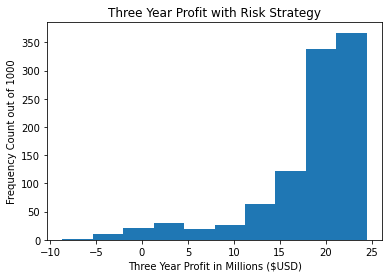

In [549]:
prof = pd.DataFrame(data = {'profit':company_profit_list})

prof[prof['profit'] <= 0].shape[0]/10

plt.hist(prof['profit']/1e6)
plt.title('Three Year Profit with Risk Strategy')
plt.ylabel('Frequency Count out of 1000')
plt.xlabel('Three Year Profit in Millions ($USD)')

plt.show()

In [550]:
prof.describe()

,profit
count,1.000000e+03
mean,1.812006e+07
std,5.936635e+06
min,-8.667482e+06
25%,1.700920e+07
50%,2.009377e+07
75%,2.187906e+07
max,2.448546e+07
